In [4]:
from utils import TreeNode, Tree
from copy import copy, deepcopy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
def transition(s, a, dt=0.2):
    """
    s: state tuple (y, v)
    a: action
    
    return next state (tuple) and reward
    """
    y, v = s
    y_next, v_next = y + v*dt, v + a*dt
    return (y_next, v_next), max(1 - y_next ** 2, 0)

In [6]:
# Example usage
depth = 5
branching_factor = 2
discount_factor = 0.8
n = 3000

initial_state = (-1, 0)
action_list = (-1, 1)

tree = Tree(depth, branching_factor, n, discount_factor, make_viz=True, sampling="from_transition",
                   initial_state=initial_state, action_list=action_list, transition=transition)

In [7]:
graph = tree.to_graphviz()
graph.render('tree', format='png', cleanup=True)

'tree.png'

# Visualizing trajectories

In [8]:
def visualize_trajectories(trajectory_points):
    x_points, y_points = zip(*trajectory_points)
    plt.plot(x_points, y_points, marker='o', markersize=2, linewidth=1, linestyle='dashed')

    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Trajectory')
    plt.grid(True)
    plt.show()

In [9]:
depth = 20
branching_factor = 2
discount_factor = 0.8
initial_state = (-2, 0)
action_list = (-1, 1)

In [10]:
n = 3000

tree_uniform = Tree(depth, branching_factor, n, discount_factor, make_viz=False, sampling="from_transition",
                    initial_state=initial_state, action_list=action_list, transition=transition, watch_states=True)
reward = tree_uniform.uniform_search()
regret_uniform = tree.compute_regret(reward)

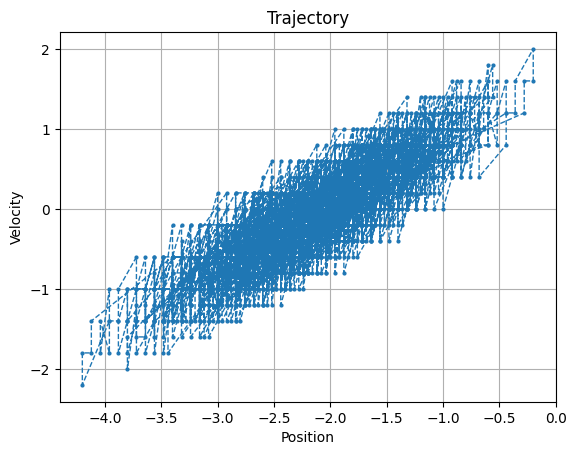

In [11]:
visualize_trajectories(tree_uniform.state_list)

In [12]:
regret_uniform

0.18738498176204793

In [13]:
n = 700

tree_opd = Tree(depth, branching_factor, n, discount_factor, make_viz=False, sampling="from_transition",
                    initial_state=initial_state, action_list=action_list, transition=transition, watch_states=True)
reward = tree_opd.optimistic_search()
regret_opd = tree.compute_regret(reward)

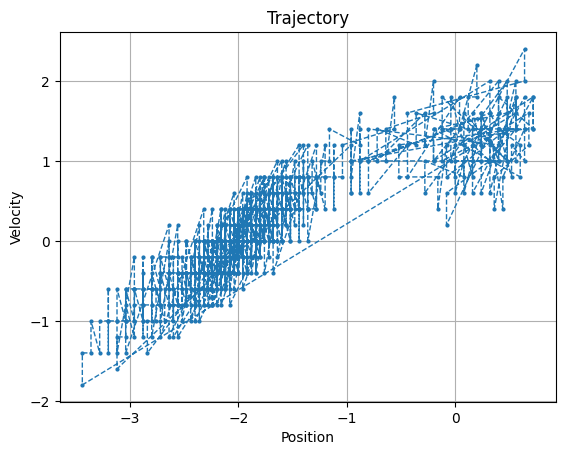

In [14]:
visualize_trajectories(tree_opd.state_list)

In [15]:
regret_opd

0.012965933810732133

In [16]:
def visualize_trajectories(ax, title, trajectory_points):
    x_points, y_points = zip(*trajectory_points)
    ax.plot(x_points, y_points, marker='o', markersize=2, linewidth=1, linestyle='dashed')

    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.set_title(title)
    ax.grid(True)

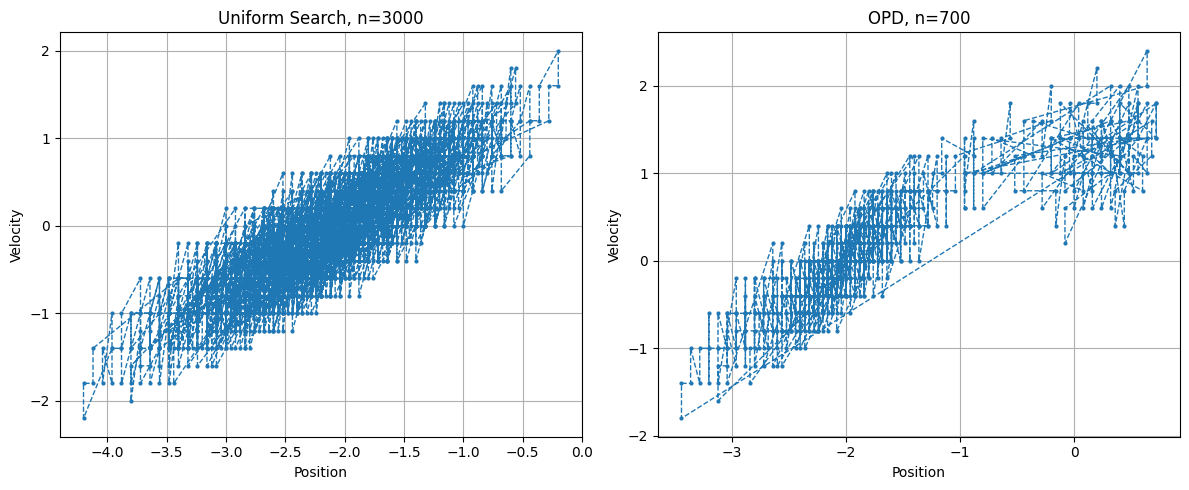

In [17]:
fig, axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

# Visualize trajectories
visualize_trajectories(axes[0], "Uniform Search, n=3000", tree_uniform.state_list)
visualize_trajectories(axes[1], "OPD, n=700", tree_opd.state_list)

plt.tight_layout()
plt.savefig("trajectories.pdf")
plt.show()

# Uniform

In [66]:
depth = 15
branching_factor = 2
discount_factor = 0.9

n_samples = 10

avg_regrets = []
for n in [10, 100, 1000, 10000]:
    print(n)
    regrets = []
    for initial_state in np.random.uniform(low=(-1,-2), high=(1,2), size=(n_samples, 2)):
        # print(initial_state)
        tree = Tree(depth, branching_factor, n, discount_factor, make_viz=False, sampling="from_transition",
                            initial_state=initial_state, action_list=action_list, transition=transition)
        reward = deepcopy(tree).uniform_search()
        regret = tree.compute_regret(reward)
        regrets.append(regret)
    avg_regrets.append(np.average(regrets))
    print(np.average(regrets))

10
1.9205168635890857
100
0.8898559586339333
1000
0.6489736549629475
10000
0.06114439369423743


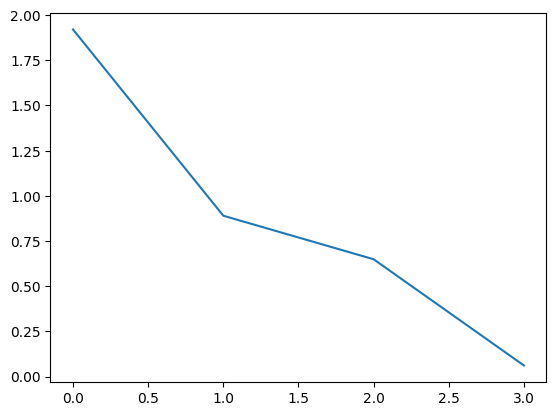

In [67]:
plt.plot(avg_regrets)

# Optimistic

In [68]:
depth = 15
branching_factor = 2
discount_factor = 0.9

n_samples = 10

avg_regrets = []
for n in [10, 100, 1000, 10000]:
    print(n)
    regrets = []
    for initial_state in np.random.uniform(low=(-1,-2), high=(1,2), size=(n_samples, 2)):
        # print(initial_state)
        tree = Tree(depth, branching_factor, n, discount_factor, make_viz=False, sampling="from_transition",
                            initial_state=initial_state, action_list=action_list, transition=transition)
        reward = deepcopy(tree).optimistic_search()
        regret = tree.compute_regret(reward)
        regrets.append(regret)
    avg_regrets.append(np.average(regrets))
    print(np.average(regrets))

10
2.4027818121871634
100
0.8541509900579707
1000
0.18192904863739778
10000
3.552713678800501e-16


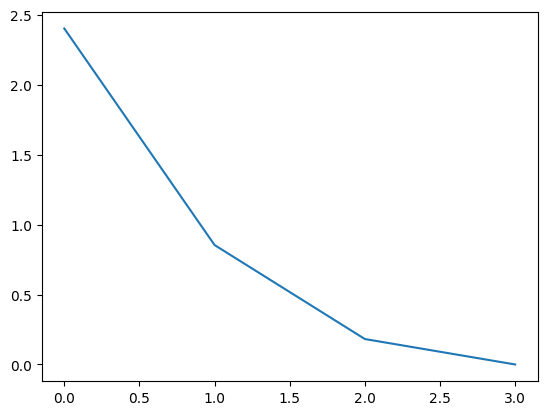

In [69]:
plt.plot(avg_regrets)